# Examples from the 6/29/2020 Advanced Coaching Session 

## Using dates in linear regression models 

In [1]:
import pandas as pd

In [2]:
# load a dataset that contains time series data
bikes = pd.read_csv("data/day_renamed_dso.csv", index_col=0)
bikes.head()

,date,season,year,month,is holiday,week day,is work day,weather,temp,felt temp,humidity,windspeed,casual riders,registered riders,total riders
instant,,,,,,,,,,,,,,,
1,2011-01-01,spring,2011,1,no,saturday,no,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,spring,2011,1,no,sunday,no,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,spring,2011,1,no,monday,yes,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,spring,2011,1,no,tuesday,yes,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,spring,2011,1,no,wednesday,yes,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# convert the date column into Python DateTime objects
# by default, the date values are read in as strings
bikes['date'] = pd.to_datetime(bikes['date'])

In [4]:
# import the built in DateTime module
import datetime as dt

In [5]:
# apply the toordinal function to each date value to get numerical representations of the date
# and put the ordinal data in a new column
# note that the ordinal data does NOT encode information about the hour or second, 
# just the day, month, and year
bikes['ordinal_date'] = bikes['date'].apply(dt.datetime.toordinal)
bikes.head()

,date,season,year,month,is holiday,week day,is work day,weather,temp,felt temp,humidity,windspeed,casual riders,registered riders,total riders,ordinal_date
instant,,,,,,,,,,,,,,,,
1,2011-01-01,spring,2011,1,no,saturday,no,2,0.344167,0.363625,0.805833,0.160446,331,654,985,734138
2,2011-01-02,spring,2011,1,no,sunday,no,2,0.363478,0.353739,0.696087,0.248539,131,670,801,734139
3,2011-01-03,spring,2011,1,no,monday,yes,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,734140
4,2011-01-04,spring,2011,1,no,tuesday,yes,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,734141
5,2011-01-05,spring,2011,1,no,wednesday,yes,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,734142


In [6]:
# as a sanity check, verify that we can convert dates back from ordinals
bikes['ordinal_date'].apply(dt.datetime.fromordinal)

instant
1     2011-01-01
2     2011-01-02
3     2011-01-03
4     2011-01-04
5     2011-01-05
         ...    
727   2012-12-27
728   2012-12-28
729   2012-12-29
730   2012-12-30
731   2012-12-31
Name: ordinal_date, Length: 731, dtype: datetime64[ns]

## Using the Pandas `rolling` method to do rolling window calculations

[Link to the Pandas `rolling` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)

In [7]:
# select the columns for which you want to perform rolling window calculations
# you will also need the column with the time/date data
bikes_numerical= bikes.loc[:,['date', 'temp', 'windspeed']]
bikes_numerical.head()

,date,temp,windspeed
instant,,,
1,2011-01-01,0.344167,0.160446
2,2011-01-02,0.363478,0.248539
3,2011-01-03,0.196364,0.248309
4,2011-01-04,0.200000,0.160296
5,2011-01-05,0.226957,0.186900


In [8]:
# set the column with the time/date data as the index
bikes_numerical = bikes_numerical.set_index("date")
bikes_numerical.head()

,temp,windspeed
date,,
2011-01-01,0.344167,0.160446
2011-01-02,0.363478,0.248539
2011-01-03,0.196364,0.248309
2011-01-04,0.200000,0.160296
2011-01-05,0.226957,0.186900


In [9]:
# calculate and plot the rolling mean, where each window contains 20 rows
bikes_numerical.rolling(window=20).mean().plot();


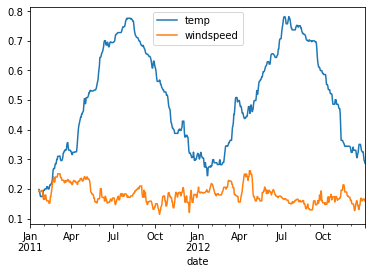

In [10]:
# calculate and plot the rolling median, where each window contains 20 rows
bikes_numerical.rolling(window=20).median().plot();

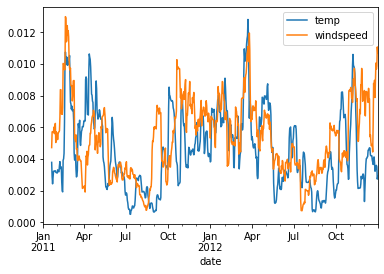

In [11]:
# calculate and plot the rolling variance, where each window contains 20 rows
bikes_numerical.rolling(window=20).var().plot();

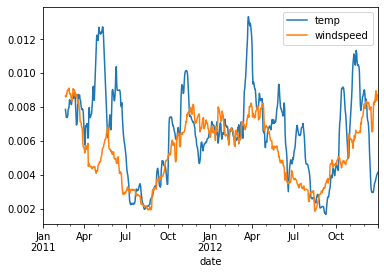

In [12]:
# calculate and plot the rolling variance, where each window contains 20 rows
bikes_numerical.rolling(window=50).var().plot();

## Using the statsmodels library for ordinary least squares regression (OLS)

[Link to the statsmodels user guide](https://www.statsmodels.org/dev/user-guide.html)

[Link to the full documentation for statsmodels OLS](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html)

In [13]:
# import the library
import statsmodels.api as sm

In [14]:
# create the X matrix
X = bikes.loc[:,['ordinal_date', 'temp', 'humidity']]
X.head()

,ordinal_date,temp,humidity
instant,,,
1,734138,0.344167,0.805833
2,734139,0.363478,0.696087
3,734140,0.196364,0.437273
4,734141,0.200000,0.590435
5,734142,0.226957,0.436957


In [15]:
# create the y array
y = bikes['total riders']

In [16]:
# create the OLS model using the X and y data
model = sm.OLS(y, X)

In [17]:
# fit the model
results = model.fit()

In [18]:
# print a summary of the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           total riders   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              2475.
Date:                Wed, 01 Jul 2020   Prob (F-statistic):                        0.00
Time:                        04:59:53   Log-Likelihood:                         -6366.0
No. Observations:                 731   AIC:                                  1.274e+04
Df Residuals:                     728   BIC:                                  1.275e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
ordinal_date     0.0036      0.000      9.788      0.000       0.003       0.004
temp          6882.8004    299.297     22.997      0.000    6295.213    7470.388
humidity     -2501.4582    384.621     -6.504      0.000   -3256.557   -1746.359
==============================================================================
Omnibus:                       14.272   Durbin-Watson:                   0.402
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.768
Skew:                           0.154   Prob(JB):                      0.00757
Kurtosis:                       2.525   Cond. No.                     5.26e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""